<a href="https://colab.research.google.com/github/claireedanaher/BigData_FinalProject/blob/master/Experiment_GPU_50DRand_Additional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES

In [0]:
## import torch
import torchvision
import torch
import torchvision.datasets as datasets
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from torch.nn import functional as F
import time
import pandas as pd 
from random import shuffle

# Pull in MNIST Data

## MNIST Data Label Generation

In [0]:
def gen_mnist():
    from sklearn.datasets.base import get_data_home 
    from sklearn.datasets import fetch_mldata
    print (get_data_home())
    mnist_raw = fetch_mldata('MNIST original', data_home=get_data_home())
    mnist=mnistData(mnist_raw.target,mnist_raw.data) 
    cnt=len(mnist.label)
    labelset=torch.tensor(mnist.label)
    labelset.shape
    dataset=torch.tensor(mnist.x,dtype=torch.float)
    number_columns=dataset.shape[1]
    dataset = dataset.view(-1,number_columns).float()/256.0
    print(dataset.shape)
    dataset=dataset.view(cnt,28,28)
    return(labelset, dataset)

# Classes

## Data Loaders

In [0]:
## CUSTOM DATA LOADER
from torch.utils.data.dataset import Dataset
class rgenData(Dataset):
    def __init__(self, randEnc, x, transform=None):
        self.randEnc= randEnc
        self.x=x 
    def __len__(self):
        z=self.x.shape[0]
        return  z
    def __getitem__(self, idx):
        randEnc=self.randEnc[idx]
        x=self.x[idx]
        return randEnc, x

## CUSTOM DATA LOADER
from torch.utils.data.dataset import Dataset
class mnistData(Dataset):
    def __init__(self, label, x, transform=None):
        self.label= label
        self.x=x 
    def __len__(self):
        z=self.x.shape[0]
        return  z
    def __getitem__(self, idx):
        label=self.label[idx]
        x=self.x[idx]
        return x

## 2D

### Decoder 1L

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_1L_2D(nn.Module):
    def __init__(self):
        super(Decoder_1L_2D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(2, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        return torch.sigmoid(out)
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded

### Decoder 2L

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_2L_2D(nn.Module):
    def __init__(self):
        super(Decoder_2L_2D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(2, 100)
        self.sig = nn.Sigmoid()
        self.fc5 = nn.Linear(100, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        out2=self.sig(out)
        out3=self.fc5(out2)
        out4=self.sig(out3)
        return out4
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded

### Decoder 3L

In [0]:
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_3L_2D(nn.Module):
    def __init__(self):
        super(Decoder_3L_2D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(2, 100)
        self.sig = nn.Sigmoid()
        self.fc5 = nn.Linear(100, 200)
        self.fc6 = nn.Linear(200, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        out2=self.sig(out)
        out3=self.fc5(out2)
        out4=self.sig(out3)
        out5=self.fc6(out4)
        out6=self.sig(out5)
        return out6
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded

### Decoder 4L

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_4L_2D(nn.Module):
    def __init__(self):
        super(Decoder_4L_2D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(2, 100)
        self.sig = nn.Sigmoid()
        self.fc5 = nn.Linear(100, 200)
        self.fc6 = nn.Linear(200, 300)
        self.fc7 = nn.Linear(300, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        out2=self.sig(out)
        out3=self.fc5(out2)
        out4=self.sig(out3)
        out5=self.fc6(out4)
        out6=self.sig(out5)
        out7=self.fc7(out6)
        out8=self.sig(out7)
        return out8
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded

### AE_2L2D

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_2L2D(nn.Module):
    def __init__(self):
        super(AE_2L2D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.sig = nn.Sigmoid()
        self.bc4 = nn.Linear(2, 100)
        self.bc5 = nn.Linear(100, 784)


        self.fw4 = nn.Linear(784, 100)
        self.fw5 = nn.Linear(100, 2)
        
    def encode(self, z):
        enc=self.fw4(z)
        enc2=self.sig(enc)
        enc3= self.fw5(enc2)
        enc4=self.sig(enc3)   
        return enc4
        
    
    def decode(self, z):
        out=self.bc4(z)
        out2=self.sig(out)
        out3=self.bc5(out2)
        out4=self.sig(out3)
        return out4
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded

### AE 1L2D

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_1L2D(nn.Module):
    def __init__(self):
        super(AE_1L2D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fw4 = nn.Linear(784, 2)
        self.bc4 = nn.Linear(2, 784)
        
    def encode(self, z):
        enc=self.fw4(z)
        return torch.sigmoid(enc)
        
    
    def decode(self, z):
        out=self.bc4(z)
        return torch.sigmoid(out)
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded

### AE 3L2D

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_3L2D(nn.Module):
    def __init__(self):
        super(AE_3L2D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.bc4 = nn.Linear(2, 100)
        self.sig = nn.Sigmoid()
        self.bc5 = nn.Linear(100, 200)
        self.bc6 = nn.Linear(200, 784)
        self.fw4 = nn.Linear(784, 200)
        self.fw5 = nn.Linear(200, 100)
        self.fw6 = nn.Linear(100, 2)
        
    def encode(self, z):
        enc=self.fw4(z)
        enc2=self.sig(enc)
        enc3= self.fw5(enc2)
        enc4=self.sig(enc3)   
        enc5=self.fw6(enc4)   
        enc6=self.sig(enc5)   
        return enc6
        
    
    def decode(self, z):
        out=self.bc4(z)
        out2=self.sig(out)
        out3=self.bc5(out2)
        out4=self.sig(out3)
        out5=self.bc6(out4)
        out6=self.sig(out5)
        return out6
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded

### AE 4L2D

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_4L2D(nn.Module):
    def __init__(self):
        super(AE_4L2D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fw4 = nn.Linear(784, 300)
        self.fw5 = nn.Linear(300, 200)
        self.fw6 = nn.Linear(200, 100)
        self.fw7 = nn.Linear(100, 2)
        self.sig = nn.Sigmoid()
        self.bc4 = nn.Linear(2, 100)        
        self.bc5 = nn.Linear(100, 200)
        self.bc6 = nn.Linear(200, 300)
        self.bc7 = nn.Linear(300, 784)


    def encode(self, z):
        enc=self.fw4(z)
        enc2=self.sig(enc)
        enc3= self.fw5(enc2)
        enc4=self.sig(enc3) 
        enc5= self.fw6(enc4)
        enc6=self.sig(enc5)  
        enc7= self.fw7(enc6)
        enc8=self.sig(enc7)  
        return enc8
        
    
    def decode(self, z):
        out=self.bc4(z)
        out2=self.sig(out)
        out3= self.bc5(out2)
        out4=self.sig(out3) 
        out5= self.bc6(out4)
        out6=self.sig(out5)  
        out7= self.bc7(out6)
        out8=self.sig(out7)  
        return out8
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded

## 6D

### Decoder 1L6D

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_1L_6D(nn.Module):
    def __init__(self):
        super(Decoder_1L_6D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(6, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        return torch.sigmoid(out)
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded

### Decoder 2L

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_2L_6D(nn.Module):
    def __init__(self):
        super(Decoder_2L_6D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(6, 100)
        self.sig = nn.Sigmoid()
        self.fc5 = nn.Linear(100, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        out2=self.sig(out)
        out3=self.fc5(out2)
        out4=self.sig(out3)
        return out4
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded

### Decoder 3L6D

In [0]:
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_3L_6D(nn.Module):
    def __init__(self):
        super(Decoder_3L_6D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(6, 100)
        self.sig = nn.Sigmoid()
        self.fc5 = nn.Linear(100, 200)
        self.fc6 = nn.Linear(200, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        out2=self.sig(out)
        out3=self.fc5(out2)
        out4=self.sig(out3)
        out5=self.fc6(out4)
        out6=self.sig(out5)
        return out6
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded

### Decoder 4L

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_4L_6D(nn.Module):
    def __init__(self):
        super(Decoder_4L_6D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(6, 100)
        self.sig = nn.Sigmoid()
        self.fc5 = nn.Linear(100,200)
        self.fc6 = nn.Linear(200, 300)
        self.fc7 = nn.Linear(300, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        out2=self.sig(out)
        out3=self.fc5(out2)
        out4=self.sig(out3)
        out5=self.fc6(out4)
        out6=self.sig(out5)
        out7=self.fc7(out6)
        out8=self.sig(out7)
        return out8
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded

### AE_1L6D

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_1L6D(nn.Module):
    def __init__(self):
        super(AE_1L6D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fw4 = nn.Linear(784, 6)
        self.bc4 = nn.Linear(6, 784)
        
    def encode(self, z):
        enc=self.fw4(z)
        return torch.sigmoid(enc)
        
    
    def decode(self, z):
        out=self.bc4(z)
        return torch.sigmoid(out)
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded

### AE_2L6d

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_2L6D(nn.Module):
    def __init__(self):
        super(AE_2L6D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.bc4 = nn.Linear(6, 100)
        self.sig = nn.Sigmoid()
        self.bc5 = nn.Linear(100, 784)
        self.fw4 = nn.Linear(784, 100)
        self.fw5 = nn.Linear(100, 6)
        
    def encode(self, z):
        enc=self.fw4(z)
        enc2=self.sig(enc)
        enc3= self.fw5(enc2)
        enc4=self.sig(enc3)   
        return enc4
        
    
    def decode(self, z):
        out=self.bc4(z)
        out2=self.sig(out)
        out3=self.bc5(out2)
        out4=self.sig(out3)
        return out4
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded
### INITALIZE MODEL PARAMS
model_AE2 =  AE_2L2D()
optimizer = torch.optim.Adam(model_AE2.parameters(), lr=LR)

### 3L6D AE

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_3L6D(nn.Module):
    def __init__(self):
        super(AE_3L6D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.bc4 = nn.Linear(6, 100)
        self.sig = nn.Sigmoid()
        self.bc5 = nn.Linear(100, 200)
        self.bc6 = nn.Linear(200, 784)
        self.fw4 = nn.Linear(784, 200)
        self.fw5 = nn.Linear(200, 100)
        self.fw6 = nn.Linear(100, 6)
        
    def encode(self, z):
        enc=self.fw4(z)
        enc2=self.sig(enc)
        enc3= self.fw5(enc2)
        enc4=self.sig(enc3)   
        enc5=self.fw6(enc4)   
        enc6=self.sig(enc5)   
        return enc6
        
    
    def decode(self, z):
        out=self.bc4(z)
        out2=self.sig(out)
        out3=self.bc5(out2)
        out4=self.sig(out3)
        out5=self.bc6(out4)
        out6=self.sig(out5)
        return out6
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded

### AE 4L6D

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_4L6D(nn.Module):
    def __init__(self):
        super(AE_4L6D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fw4 = nn.Linear(784, 300)
        self.fw5 = nn.Linear(300, 200)
        self.fw6 = nn.Linear(200, 100)
        self.fw7 = nn.Linear(100, 6)
        self.sig = nn.Sigmoid()
        self.bc4 = nn.Linear(6, 100)        
        self.bc5 = nn.Linear(100, 200)
        self.bc6 = nn.Linear(200, 300)
        self.bc7 = nn.Linear(300, 784)


    def encode(self, z):
        enc=self.fw4(z)
        enc2=self.sig(enc)
        enc3= self.fw5(enc2)
        enc4=self.sig(enc3) 
        enc5= self.fw6(enc4)
        enc6=self.sig(enc5)  
        enc7= self.fw7(enc6)
        enc8=self.sig(enc7)  
        return enc8
        
    
    def decode(self, z):
        out=self.bc4(z)
        out2=self.sig(out)
        out3= self.bc5(out2)
        out4=self.sig(out3) 
        out5= self.bc6(out4)
        out6=self.sig(out5)  
        out7= self.bc7(out6)
        out8=self.sig(out7)  
        return out8
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded

## 50 D

### Decoder 1L50D

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_1L_50D(nn.Module):
    def __init__(self):
        super(Decoder_1L_50D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(50, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        return torch.sigmoid(out)
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded


### Decoder 2L

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_2L_50D(nn.Module):
    def __init__(self):
        super(Decoder_2L_50D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(50, 100)
        self.sig = nn.Sigmoid()
        self.fc5 = nn.Linear(100, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        out2=self.sig(out)
        out3=self.fc5(out2)
        out4=self.sig(out3)
        return out4
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded

### Decoder 3L50D

In [0]:
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_3L_50D(nn.Module):
    def __init__(self):
        super(Decoder_3L_50D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(50, 100)
        self.sig = nn.Sigmoid()
        self.fc5 = nn.Linear(100, 200)
        self.fc6 = nn.Linear(200, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        out2=self.sig(out)
        out3=self.fc5(out2)
        out4=self.sig(out3)
        out5=self.fc6(out4)
        out6=self.sig(out5)
        return out6
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded

### Decoder 4L

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_4L_50D(nn.Module):
    def __init__(self):
        super(Decoder_4L_50D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(50, 100)
        self.sig = nn.Sigmoid()
        self.fc5 = nn.Linear(100,200)
        self.fc6 = nn.Linear(200, 300)
        self.fc7 = nn.Linear(300, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        out2=self.sig(out)
        out3=self.fc5(out2)
        out4=self.sig(out3)
        out5=self.fc6(out4)
        out6=self.sig(out5)
        out7=self.fc7(out6)
        out8=self.sig(out7)
        return out8
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded

### 3L50D AE

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_3L50D(nn.Module):
    def __init__(self):
        super(AE_3L50D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.bc4 = nn.Linear(50, 100)
        self.sig = nn.Sigmoid()
        self.bc5 = nn.Linear(100, 200)
        self.bc6 = nn.Linear(200, 784)
        self.fw4 = nn.Linear(784, 200)
        self.fw5 = nn.Linear(200, 100)
        self.fw6 = nn.Linear(100, 50)
        
    def encode(self, z):
        enc=self.fw4(z)
        enc2=self.sig(enc)
        enc3= self.fw5(enc2)
        enc4=self.sig(enc3)   
        enc5=self.fw6(enc4)   
        enc6=self.sig(enc5)   
        return enc6
        
    
    def decode(self, z):
        out=self.bc4(z)
        out2=self.sig(out)
        out3=self.bc5(out2)
        out4=self.sig(out3)
        out5=self.bc6(out4)
        out6=self.sig(out5)
        return out6
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded

### AE_1L50D

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_1L50D(nn.Module):
    def __init__(self):
        super(AE_1L50D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fw4 = nn.Linear(784, 50)
        self.bc4 = nn.Linear(50, 784)
        
    def encode(self, z):
        enc=self.fw4(z)
        return torch.sigmoid(enc)
        
    
    def decode(self, z):
        out=self.bc4(z)
        return torch.sigmoid(out)
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded

### AE_2L50D

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_2L50D(nn.Module):
    def __init__(self):
        super(AE_2L50D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.bc4 = nn.Linear(50, 100)
        self.sig = nn.Sigmoid()
        self.bc5 = nn.Linear(100, 784)
        self.fw4 = nn.Linear(784, 100)
        self.fw5 = nn.Linear(100, 50)
        
    def encode(self, z):
        enc=self.fw4(z)
        enc2=self.sig(enc)
        enc3= self.fw5(enc2)
        enc4=self.sig(enc3)   
        return enc4
        
    
    def decode(self, z):
        out=self.bc4(z)
        out2=self.sig(out)
        out3=self.bc5(out2)
        out4=self.sig(out3)
        return out4
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded

### AE 4L50D

In [0]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_4L50D(nn.Module):
    def __init__(self):
        super(AE_4L50D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fw4 = nn.Linear(784, 300)
        self.fw5 = nn.Linear(300, 200)
        self.fw6 = nn.Linear(200, 100)
        self.fw7 = nn.Linear(100, 50)
        self.sig = nn.Sigmoid()
        self.bc4 = nn.Linear(50, 100)        
        self.bc5 = nn.Linear(100, 200)
        self.bc6 = nn.Linear(200, 300)
        self.bc7 = nn.Linear(300, 784)


    def encode(self, z):
        enc=self.fw4(z)
        enc2=self.sig(enc)
        enc3= self.fw5(enc2)
        enc4=self.sig(enc3) 
        enc5= self.fw6(enc4)
        enc6=self.sig(enc5)  
        enc7= self.fw7(enc6)
        enc8=self.sig(enc7)  
        return enc8
        
    
    def decode(self, z):
        out=self.bc4(z)
        out2=self.sig(out)
        out3= self.bc5(out2)
        out4=self.sig(out3) 
        out5= self.bc6(out4)
        out6=self.sig(out5)  
        out7= self.bc7(out6)
        out8=self.sig(out7)  
        return out8
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded

# Functions

In [0]:
def loss_function(recon_x, x):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    return(BCE)
def decode_loader(data, batch_size):
    perm = torch.randperm(data.size(0))
    idx = perm[:batch_size]
    batch=data[idx]
    return(batch)
def export_tensor(out_tensor,filename):
    arr = out_tensor.data.cpu().numpy()
    # write CSV
    np.savetxt(filename, arr)
def import_tensor(filename):
    from numpy import genfromtxt
    test = np.genfromtxt(filename)
    import_tensor=torch.tensor(test, dtype=torch.float)
    return(import_tensor)
def import_saved_output(filenames,loss_filename):
    imp_data=[]
    for i in range(0,len(filenames)):
        out_file='output/'+filenames[i]+'.csv'
        test=import_tensor(out_file)
        imp_data.append(test)
    test_lossvec = np.genfromtxt(loss_filename)
    return(imp_data, test_lossvec)

# Data Generation

## Pull Indices and Labels

In [0]:
def get_images(img_return_cnt,labels_raw, data_raw):
    found=False
    img_agg_cnt=np.zeros(10)
    img_return_cnt=np.array(img_return_cnt)
    i=0
    labels=[]
    indices=[]
    while found==False and 70000>i:
        target=labels_raw[i]
        index=int(labels_raw[i].data)
        if np.dot(np.subtract(img_agg_cnt, img_return_cnt),np.ones(10))==0:
            found=True
        else:
            if img_agg_cnt[index] < img_return_cnt[index]:
                img_agg_cnt[index]+=1
                indices.append(i)
        i+=1
    return(indices)

## Gen Random Embeddings

In [0]:
def gen_rand_data(img_return_cnt,labels_raw, data_raw,Rdim):
    #num_img_type= scalar= equal to the number of image categories
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    #example_data = data loader data in form: batch_idx, (example_data, example_targets) 
    #max_i= data size
    #Rdim= vector dimension for rand generation
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    found=False
    img_agg_cnt=np.zeros(10)
    img_return_cnt=np.array(img_return_cnt)
    i=0
    first=True
    labels=[]
    indices=[]
    while found==False and 70000>i:
        target=labels_raw[i]
        index=int(labels_raw[i].data)
        if np.dot(np.subtract(img_agg_cnt, img_return_cnt),np.ones(10))==0:
            found=True
        else:
            if img_agg_cnt[index] < img_return_cnt[index]:
                labels.append(target.item())
                datum=data_raw[i].view(-1,28*28)
                img_agg_cnt[index]+=1
                indices.append(i)
                if first==True:
                    x_tensor=datum
                    randEnc_tensor=torch.rand(1, Rdim)
                    first=False 
                else:
                    omega=torch.rand(1, Rdim)
                    x_tensor=torch.cat((x_tensor,datum),0)
                    randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
        i+=1
    data = rgenData(randEnc_tensor, x_tensor)
    return(data, labels, indices)

## Create RandEmbedding with Image Index

In [0]:
def get_randenc_byindex(indices, labels_raw, data_raw,Rdim):
    #num_img_type= scalar= equal to the number of image categories
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    #example_data = data loader data in form: batch_idx, (example_data, example_targets) 
    #max_i= data size
    #Rdim= vector dimension for rand generation
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    i=0
    cnt=len(indices)
    labels=[]
    datum=data_raw[indices[0]].view(-1,28*28)
    x_tensor=datum
    randEnc_tensor=torch.rand(1, Rdim)
    labels.append(labels_raw[0])
    for i in range(1,len(indices)):
        index=indices[i]
        labels.append(labels_raw[index])
        datum=data_raw[index].view(-1,28*28)
        omega=torch.rand(1, Rdim)
        x_tensor=torch.cat((x_tensor,datum),0)
        randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
    data = rgenData(randEnc_tensor, x_tensor)
    return(data, labels)

## Gen Dataset Given Image Index & Array of Embedding

In [0]:
def get_enc_img(indices,labels_raw, data_raw,embedding):
    #num_img_type= scalar= equal to the number of image categories
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    #example_data = data loader data in form: batch_idx, (example_data, example_targets) 
    #max_i= data size
    #Rdim= vector dimension for rand generation
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    i=0
    cnt=len(indices)
    labels=[]
    datum=data_raw[indices[0]].view(-1,28*28)
    x_tensor=datum
    randEnc_tensor=torch.tensor(embedding[0], dtype=torch.float)
    labels.append(labels_raw[0])
    for i in range(1,len(indices)):
        index=indices[i]
        labels.append(labels_raw[index])
        datum=data_raw[index].view(-1,28*28)
        omega=torch.tensor(embedding[i], dtype=torch.float)
        x_tensor=torch.cat((x_tensor,datum),0)
        randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
    data = rgenData(randEnc_tensor, x_tensor)
    return(data, labels)

# Models

## Train Decoder

In [0]:
def train_decoder(epoch, data, model, optimizer,size,log_interval=10):
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    for i in range(1, epoch):
        if i%10000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            randEnc=data.randEnc[j]
            cnt+=1
            encoded, decoded = model.forward(randEnc)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (size*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt, model)

## Train AE

In [0]:
def train_AE(epoch, data, model, optimizer,size,log_interval=10):
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    for i in range(1, epoch):
        if i%10000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            cnt+=1
            encoded, decoded = model.forward(x)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (size*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt, model)

# Plotting

In [0]:
def x_xd_plot_compare(data,model,instances,ae=False): 
    rows=instances
    cols=2
    tot=int(instances)*cols
    fig = plt.figure(figsize=(rows, rows))
    plt.tight_layout() 
    # plot with various axes scales
    loc=0
    fig.subplots_adjust(hspace=.5)
    case=0
    while case<(rows):
        # linear
        loc+=1
        tensor=data[case][1].view(28,28)
        if ae==False:
            tensor_d=model.decode(data[case][0])
            encoded=data[case][0]
        else:
            encoded, tensor_d=model.forward(data[case][1])
        Rdim=encoded.shape
        Rdim=Rdim[0]
        tensor_d_plt=tensor_d.view(28,28)
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor.cpu().detach().numpy(),cmap='gray')
        plt.title(str(case))


        loc+=1
        # log
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor_d_plt.cpu().detach().numpy(),cmap='gray')
        plt.title(str(case))


        if case==0:
            exp_tensor=data[case][1]
            exp_tensor_d=tensor_d
            exp_omega=encoded
        else:
            exp_tensor=torch.cat((exp_tensor,data[case][1]),0)
            exp_tensor_d=torch.cat((exp_tensor_d,tensor_d),0)
            exp_omega=torch.cat((exp_omega, encoded),0)
        case+=1

    plt.show()
    return(exp_tensor.view(instances,784),exp_tensor_d.view(instances,784),exp_omega.view(instances,Rdim))


In [0]:
def plot_compare(x, x_d): 
    rows=len(x)
    cols=2
    fig = plt.figure(figsize=(rows, rows))
    plt.tight_layout() 
    # plot with various axes scales
    loc=0
    fig.subplots_adjust(hspace=.5)
    case=0
    while case<(rows):
        tensor=x[case].view(28,28)      
        tensor_d=x_d[case].view(28,28)
        ########################################
        loc+=1
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor.detach().numpy(),cmap='gray')
        plt.title(str(case))

        loc+=1
        # log
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor_d.detach().numpy(),cmap='gray')
        plt.title(str(case))
        case+=1
    plt.show()
    return()

# Experiments

In [0]:
exp_name="GPU_50DRand_"

In [0]:
#labelset, dataset=gen_mnist()
EPOCH=1000000

## Import MNIST Data

In [1]:
print('cuda found')
#print(torch.cuda.is_available())

cuda found


In [0]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

mnist = fetch_openml('mnist_784', cache=False)
mnist.data.shape

import_file = mnist.target.astype('float32')

#import_file = np.genfromtxt('mnist_labelset.txt')
labelset=torch.tensor(import_file).cuda()
#labelset=torch.tensor(import_file)
#pd_dataset=pd.read_csv("mnist_dataset.csv")
np_dataset=mnist.data.astype('float32')
dataset_test=np_dataset.reshape(70000,28,28)
dataset=torch.tensor(dataset_test,dtype=torch.float).cuda()
#dataset=torch.tensor(dataset_test,dtype=torch.float


### Ref code for pulling images

## Gen Data by Dime

In [0]:
# Pull Rnadom Encodings for Certain Image Types
'''
img_return_cnt=np.zeros(10)
img_return_cnt[0]=2
img_return_cnt[1]=2
img_return_cnt[2]=2
img_return_cnt[3]=2
img_return_cnt[4]=2
img_return_cnt[5]=2
img_return_cnt[6]=1
img_return_cnt[7]=1
img_return_cnt[8]=1
img_return_cnt[9]=1
rdim=2
batch_size=4

indices=get_images(img_return_cnt,labelset, dataset)
ind_shuffle=indices[:]
shuffle(ind_shuffle)
print(ind_shuffle)
data, labels=get_randenc_byindex(ind_shuffle, labelset, dataset,rdim)
'''

'\nimg_return_cnt=np.zeros(10)\nimg_return_cnt[0]=2\nimg_return_cnt[1]=2\nimg_return_cnt[2]=2\nimg_return_cnt[3]=2\nimg_return_cnt[4]=2\nimg_return_cnt[5]=2\nimg_return_cnt[6]=1\nimg_return_cnt[7]=1\nimg_return_cnt[8]=1\nimg_return_cnt[9]=1\nrdim=2\nbatch_size=4\n\nindices=get_images(img_return_cnt,labelset, dataset)\nind_shuffle=indices[:]\nshuffle(ind_shuffle)\nprint(ind_shuffle)\ndata, labels=get_randenc_byindex(ind_shuffle, labelset, dataset,rdim)\n'

In [0]:
# Pull Random Encodings and Random Images

In [0]:
rdim=50
batch_size=4
ind_shuffle=[24755, 48200, 1, 18624, 0, 24754, 12666, 30596, 54051, 30597, 5924, 18623, 41935, 12665, 36017, 5923]
data, labels=get_randenc_byindex(ind_shuffle, labelset, dataset,rdim)

In [0]:
# Pull Images to go with ETF
'''
embedding=np.matrix([[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1],
[1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
[1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1],
[1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1],
[1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1],
[1, -1, -1, -1,-1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1]])
embedding=embedding.transpose()

ind_shuffle=indices[:]

data, labels=get_enc_img(ind_shuffle,labelset, dataset,embedding)
'''


'\nembedding=np.matrix([[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1],\n[1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1],\n[1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1],\n[1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1],\n[1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1],\n[1, -1, -1, -1,-1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1]])\nembedding=embedding.transpose()\n\nind_shuffle=indices[:]\n\ndata, labels=get_enc_img(ind_shuffle,labelset, dataset,embedding)\n'

# Experiment

### Run Code

In [0]:
expnum='1'
model_in =   Decoder_1L_50D().cuda()
#model_in =   AE_1L50D()
print('model loaded as cuda')
print(model_in.parameters())
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()


--- train mins %---
3.325939178466797e-05
AE2D_100K


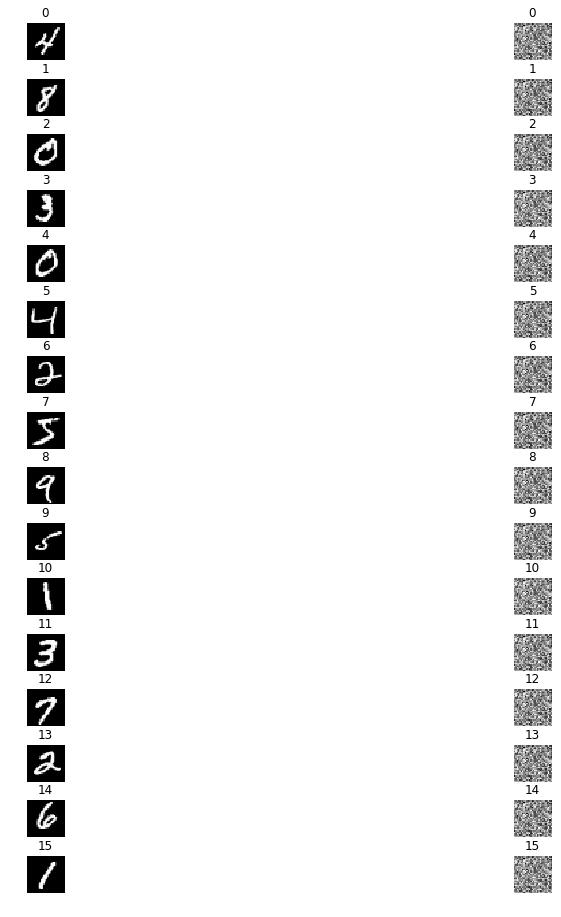

In [0]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_decoder(EPOCH,data,model_in, optimizer,size) 
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###############################################################################################################################
## UPDATE
print(exp_name)
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size)


In [0]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_in.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])
    
PATH='output/'+exp_name+'exp'+expnum+'model.pt'
torch.save(model_in.state_dict(), PATH)

###############################################################################################################################
## UPDATE
print(exp_name)
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size,ae=True)

In [0]:
tensor_d_name='output/'+exp_name+'exp'+expnum+'_tensor_d'
tensor_name='output/'+exp_name+'exp'+expnum+'_tensor'
omega_name='output/'+exp_name+'exp'+expnum+'_omega'
loss_filename='output/'+exp_name+'exp'+expnum+'_lossvec.csv'
labels_filename='output/'+exp_name+'exp'+expnum+'_labels_test.csv'

filenames=[tensor_name, tensor_d_name, omega_name]
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

for i in range(0,len(filenames)):
    out_file=filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)
np.savetxt(labels_filename, labels)

# Experiment

### Run Code

In [0]:
expnum='2'
model_in = AE_1L50D().cuda()
#model_in =   AE_1L50D()
print('model loaded as cuda')
print(model_in.parameters())
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()


--- train mins %---
3.325939178466797e-05
AE2D_100K


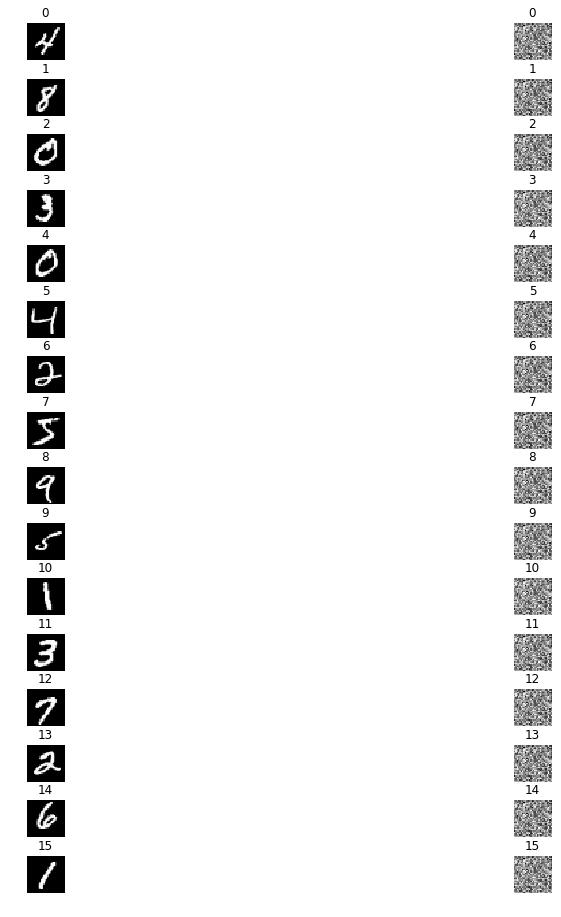

In [0]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_AE(EPOCH,data, model_in, optimizer,size)

print('--- train mins %---')
print((time.time() - start_time)/60)
######################################


In [0]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_in.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])
    
PATH='output/'+exp_name+'exp'+expnum+'model.pt'
torch.save(model_in.state_dict(), PATH)

###############################################################################################################################
## UPDATE
print(exp_name)
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size,ae=True)

In [0]:
tensor_d_name='output/'+exp_name+'exp'+expnum+'_tensor_d'
tensor_name='output/'+exp_name+'exp'+expnum+'_tensor'
omega_name='output/'+exp_name+'exp'+expnum+'_omega'
loss_filename='output/'+exp_name+'exp'+expnum+'_lossvec.csv'
labels_filename='output/'+exp_name+'exp'+expnum+'_labels_test.csv'

filenames=[tensor_name, tensor_d_name, omega_name]
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

for i in range(0,len(filenames)):
    out_file=filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)
np.savetxt(labels_filename, labels)

NameError: name 'exp_name' is not defined

### Run Code

In [0]:
expnum='3'
model_in =   Decoder_2L_50D().cuda()
#model_in =   AE_1L50D()
print('model loaded as cuda')
print(model_in.parameters())
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()


--- train mins %---
3.325939178466797e-05
AE2D_100K


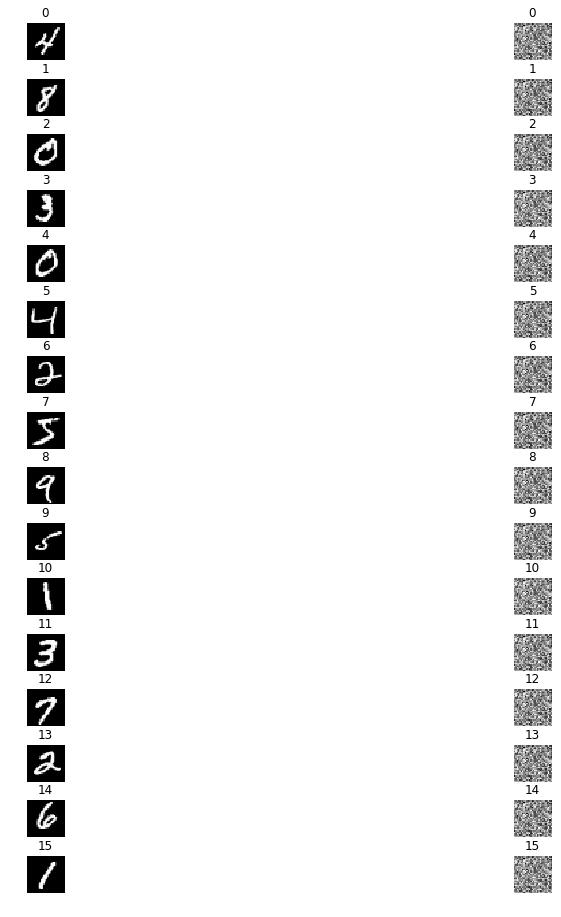

In [0]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_decoder(EPOCH,data,model_in, optimizer,size) 
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###############################################################################################################################
## UPDATE
print(exp_name)
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size)


In [0]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_in.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])
    
PATH='output/'+exp_name+'exp'+expnum+'model.pt'
torch.save(model_in.state_dict(), PATH)

###############################################################################################################################
## UPDATE
print(exp_name)
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size,ae=True)

In [0]:
tensor_d_name='output/'+exp_name+'exp'+expnum+'_tensor_d'
tensor_name='output/'+exp_name+'exp'+expnum+'_tensor'
omega_name='output/'+exp_name+'exp'+expnum+'_omega'
loss_filename='output/'+exp_name+'exp'+expnum+'_lossvec.csv'
labels_filename='output/'+exp_name+'exp'+expnum+'_labels_test.csv'

filenames=[tensor_name, tensor_d_name, omega_name]
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

for i in range(0,len(filenames)):
    out_file=filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)
np.savetxt(labels_filename, labels)

# Experiment

### Run Code

In [0]:
expnum='4'
model_in = AE_2L50D().cuda()
#model_in =   AE_1L50D()
print('model loaded as cuda')
print(model_in.parameters())
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()


--- train mins %---
3.325939178466797e-05
AE2D_100K


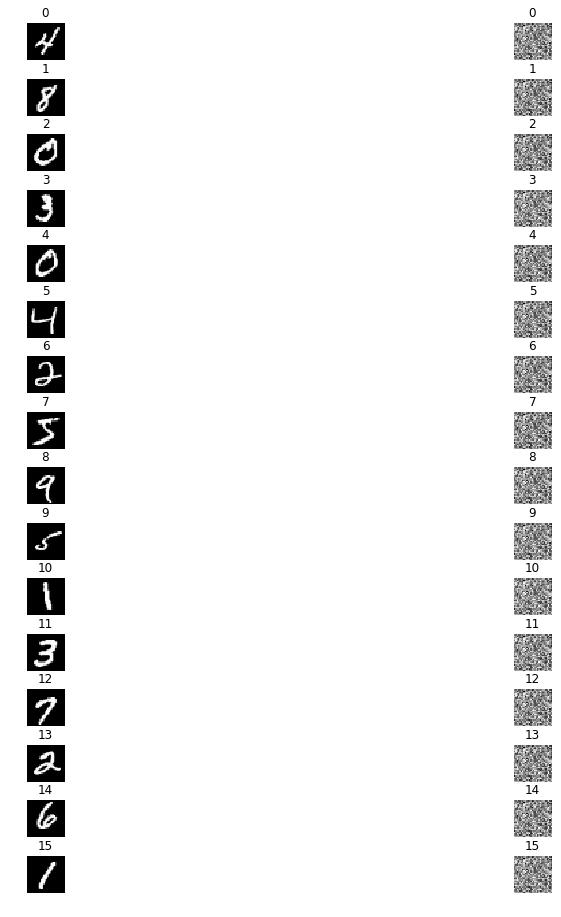

In [0]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_AE(EPOCH,data, model_in, optimizer,size)

print('--- train mins %---')
print((time.time() - start_time)/60)
######################################


In [0]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_in.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])
    
PATH='output/'+exp_name+'exp'+expnum+'model.pt'
torch.save(model_in.state_dict(), PATH)

###############################################################################################################################
## UPDATE
print(exp_name)
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size,ae=True)

In [0]:
tensor_d_name='output/'+exp_name+'exp'+expnum+'_tensor_d'
tensor_name='output/'+exp_name+'exp'+expnum+'_tensor'
omega_name='output/'+exp_name+'exp'+expnum+'_omega'
loss_filename='output/'+exp_name+'exp'+expnum+'_lossvec.csv'
labels_filename='output/'+exp_name+'exp'+expnum+'_labels_test.csv'

filenames=[tensor_name, tensor_d_name, omega_name]
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

for i in range(0,len(filenames)):
    out_file=filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)
np.savetxt(labels_filename, labels)

NameError: name 'exp_name' is not defined

### Run Code

In [0]:
expnum='5'
model_in =   Decoder_3L_50D().cuda()
#model_in =   AE_1L50D()
print('model loaded as cuda')
print(model_in.parameters())
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()


--- train mins %---
3.325939178466797e-05
AE2D_100K


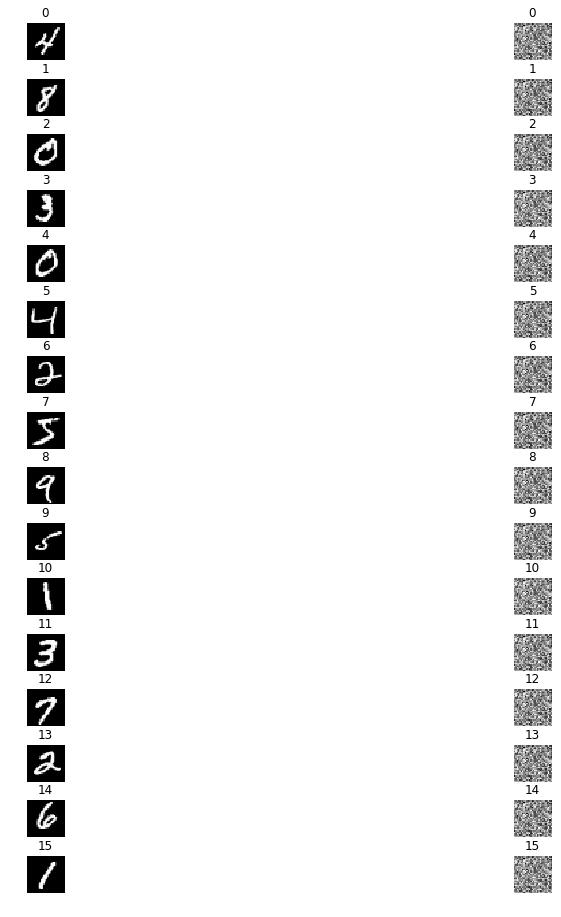

In [0]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_decoder(EPOCH,data,model_in, optimizer,size) 
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###############################################################################################################################
## UPDATE
print(exp_name)
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size)


In [0]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_in.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])
    
PATH='output/'+exp_name+'exp'+expnum+'model.pt'
torch.save(model_in.state_dict(), PATH)

###############################################################################################################################
## UPDATE
print(exp_name)
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size,ae=True)

In [0]:
tensor_d_name='output/'+exp_name+'exp'+expnum+'_tensor_d'
tensor_name='output/'+exp_name+'exp'+expnum+'_tensor'
omega_name='output/'+exp_name+'exp'+expnum+'_omega'
loss_filename='output/'+exp_name+'exp'+expnum+'_lossvec.csv'
labels_filename='output/'+exp_name+'exp'+expnum+'_labels_test.csv'

filenames=[tensor_name, tensor_d_name, omega_name]
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

for i in range(0,len(filenames)):
    out_file=filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)
np.savetxt(labels_filename, labels)

# Experiment

### Run Code

In [0]:
expnum='6'
model_in = AE_3L50D().cuda()
#model_in =   AE_1L50D()
print('model loaded as cuda')
print(model_in.parameters())
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()


--- train mins %---
3.325939178466797e-05
AE2D_100K


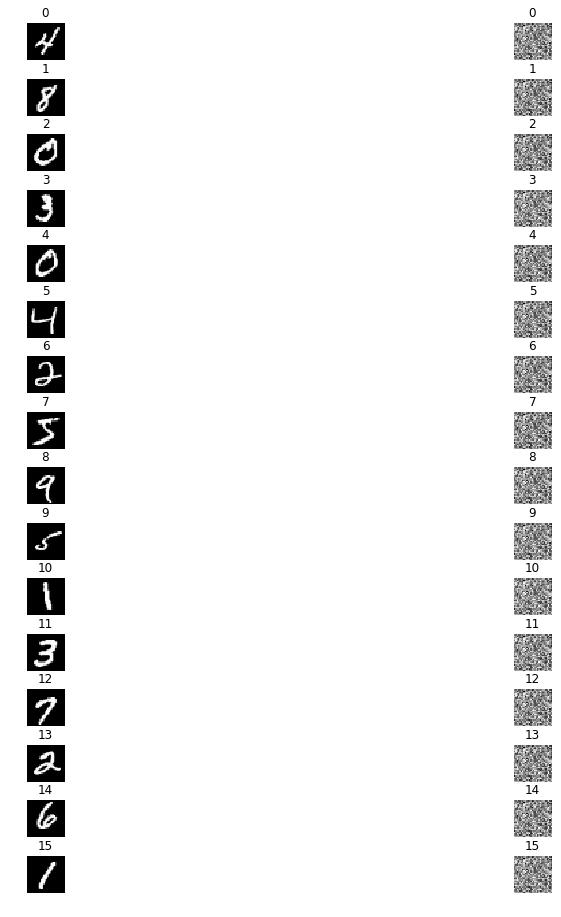

In [0]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_AE(EPOCH,data, model_in, optimizer,size)

print('--- train mins %---')
print((time.time() - start_time)/60)
######################################


In [0]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_in.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])
    
PATH='output/'+exp_name+'exp'+expnum+'model.pt'
torch.save(model_in.state_dict(), PATH)

###############################################################################################################################
## UPDATE
print(exp_name)
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size,ae=True)

In [0]:
tensor_d_name='output/'+exp_name+'exp'+expnum+'_tensor_d'
tensor_name='output/'+exp_name+'exp'+expnum+'_tensor'
omega_name='output/'+exp_name+'exp'+expnum+'_omega'
loss_filename='output/'+exp_name+'exp'+expnum+'_lossvec.csv'
labels_filename='output/'+exp_name+'exp'+expnum+'_labels_test.csv'

filenames=[tensor_name, tensor_d_name, omega_name]
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

for i in range(0,len(filenames)):
    out_file=filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)
np.savetxt(labels_filename, labels)

NameError: name 'exp_name' is not defined

### Run Code

In [0]:
expnum='7'
model_in =   Decoder_4L_50D().cuda()
#model_in =   AE_1L50D()
print('model loaded as cuda')
print(model_in.parameters())
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()


--- train mins %---
3.325939178466797e-05
AE2D_100K


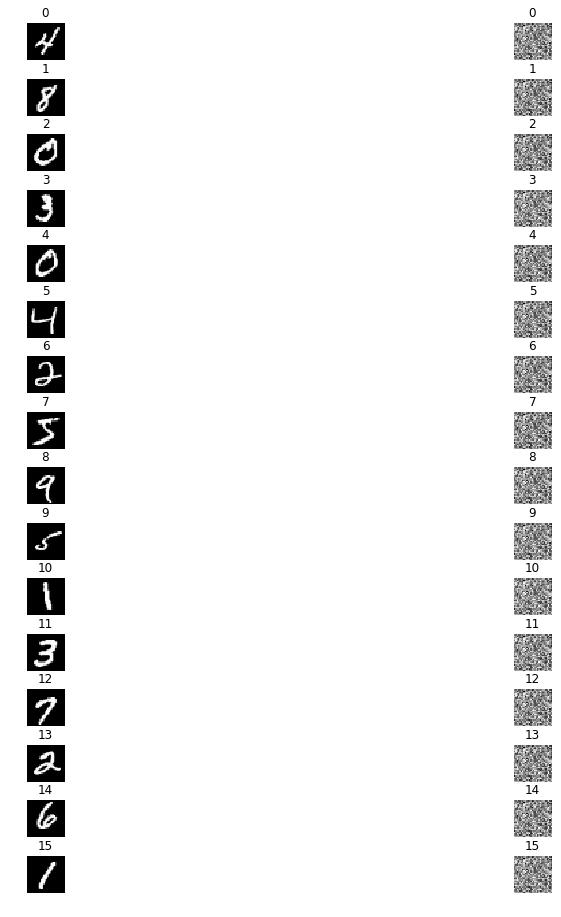

In [0]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_decoder(EPOCH,data,model_in, optimizer,size) 
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###############################################################################################################################
## UPDATE
print(exp_name)
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size)


In [0]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_in.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])
    
PATH='output/'+exp_name+'exp'+expnum+'model.pt'
torch.save(model_in.state_dict(), PATH)

###############################################################################################################################
## UPDATE
print(exp_name)
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size,ae=True)

In [0]:
tensor_d_name='output/'+exp_name+'exp'+expnum+'_tensor_d'
tensor_name='output/'+exp_name+'exp'+expnum+'_tensor'
omega_name='output/'+exp_name+'exp'+expnum+'_omega'
loss_filename='output/'+exp_name+'exp'+expnum+'_lossvec.csv'
labels_filename='output/'+exp_name+'exp'+expnum+'_labels_test.csv'

filenames=[tensor_name, tensor_d_name, omega_name]
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

for i in range(0,len(filenames)):
    out_file=filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)
np.savetxt(labels_filename, labels)

# Experiment

### Run Code

In [46]:
expnum='8'
model_in = AE_4L50D().cuda()
#model_in =   AE_1L50D()
print('model loaded as cuda')
print(model_in.parameters())
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()


model loaded as cuda
<generator object Module.parameters at 0x7f5141d83990>


In [0]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_AE(EPOCH,data, model_in, optimizer,size)

print('--- train mins %---')
print((time.time() - start_time)/60)
######################################


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000


In [0]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_in.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])
    
PATH='output/'+exp_name+'exp'+expnum+'model.pt'
torch.save(model_in.state_dict(), PATH)

###############################################################################################################################
## UPDATE
print(exp_name)
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size,ae=True)

In [0]:
tensor_d_name='output/'+exp_name+'exp'+expnum+'_tensor_d'
tensor_name='output/'+exp_name+'exp'+expnum+'_tensor'
omega_name='output/'+exp_name+'exp'+expnum+'_omega'
loss_filename='output/'+exp_name+'exp'+expnum+'_lossvec.csv'
labels_filename='output/'+exp_name+'exp'+expnum+'_labels_test.csv'

filenames=[tensor_name, tensor_d_name, omega_name]
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

for i in range(0,len(filenames)):
    out_file=filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)
np.savetxt(labels_filename, labels)

NameError: name 'exp_name' is not defined